# PyTorch Data Loading

## PyTorch has really neat ways of loading data. Let's use this to load Cat and Dog images for our classifier.

In [7]:
# Image directories
cat_dir = 'D:\DATA\PyTorch_BASIC\CATS_DOGS\train\Cat' # Directory full of 12500 cat images
dog_dir = 'D:\DATA\PyTorch_BASIC\CATS_DOGS\train\Dog' # Directory full of 12500 dog images
numpy_dir = 'D:/DATA/PyTorch_BASIC/CATS_DOGS/training_data.npy'

In [4]:
# Before we can use the Dataset class, we want to make a numpy array with the labeled data
def make_training_data():
    LABELS = {CATS:0, DOGS:1}
    IMG_SIZE = 50
    training_data = []
    for label in LABELS:
        for f in tqdm(os.listdir(label)):
            try: # In case certain images can't be accessed
                path = os.path.join(label, f)
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                training_data.append([np.array(img), np.eye(2)[LABELS[label]]]) # np.eye creates one hot vectors
            except Exception as e:
                pass
    
    training_data = np.array(training_data)
    np.random.shuffle(training_data)
    np.save(numpy_dir, training_data)

saved = True
if not saved: # Don't want to recreate it every time we run the notebook
    make_training_data()

In [21]:
# Required libraries
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms # Torch vision is a PyTorch library for computer vision
import numpy as np
from tqdm import tqdm # Progress Bar library
import matplotlib.pyplot as plt

## Dataset class: PyTorch wrapper class for custom data sets.
## DataLoader: Loads data in batches and applies transforms to data

In [15]:
# We have to create a dataset class that inherits from Dataset; we can work from the numpy file we created

class DOGVCAT_DATA(Dataset):
    def __init__(self, data_npy, transforms = None):
        self.data_npy = data_npy
        self.transforms = transforms
        
        self.X_train = torch.Tensor([i[0] for i in self.data_npy]).view(-1, 1, 50, 50) # (# of imgs, channels, img_size, img_size)
        self.X_train /= 255 # Normalizing
        self.y_train = torch.Tensor([i[1] for i in self.data_npy])
        
    def __len__(self): # Special method to define the length of the data (REQUIRED)
        return self.y_train.shape[0]
    def __getitem__(self, idx): # Special method to define how to access an item (REQUIRED)
        return self.X_train[idx], self.y_train[idx]

In [16]:
batch_size = 32
training_npy = np.load(numpy_dir, allow_pickle = True) # Loading the numpy data
training_data = DOGVCAT_DATA(training_npy)
train_loader = DataLoader(training_data, batch_size = batch_size, shuffle = True)

In [20]:
# We can view the images and labels to make sure everything is good
img_batch = -1
label_batch = -1
for batch in train_loader:
    img_batch = batch[0]
    label_batch = batch[1]
print(img_batch.size())
print(label_batch.size())

torch.Size([8, 1, 50, 50])
torch.Size([8, 2])


tensor([0., 1.])


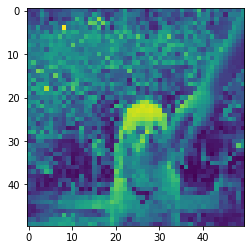

In [22]:
img = img_batch[0].view(50, 50)
label = label_batch[0]
plt.imshow(img)
print(label)

## Great! Our data is all set up for training...